Progress report 1: Data overview
===

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import nltk

In [4]:
dir = '/users/eva/Documents/Data_Science/Blog-Sentiment-Analysis/'

Reading the data into a DataFrame
---
When I first explored the data, I had a really hard time working with the XML encoding. I looked up more information about the data, and discovered another linguist, Dr. Rachael Tatman, turned this data into a .csv file and reuploaded it to the internet with the exact same license -  may be freely used for non-commercial research purposes. And hey... why reinvent the wheel.

The CSV version of the data can be found [here](https://www.kaggle.com/rtatman/blog-authorship-corpus/version/2).

In [5]:
blogdata = pd.read_csv(dir + 'data/blogtext.csv')

In [6]:
blogdata.head(3)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...


The industry category has been named "topic" here. I am going to change it to industry to clarify that it refers to career.

In [44]:
blogdata.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [45]:
newcolumns = ['id', 'gender', 'age', 'industry', 'sign', 'date', 'text']
blogdata.columns = newcolumns
blogdata.head(3)

,id,gender,age,industry,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...


Looks good.

In [7]:
blogdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
id        681284 non-null int64
gender    681284 non-null object
age       681284 non-null int64
topic     681284 non-null object
sign      681284 non-null object
date      681284 non-null object
text      681284 non-null object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


I assume that Dr. Tatman already cleaned up the data, so it looks pretty good. No null objects in any category. The original corpus website states that there are [681,288 blogs](http://u.cs.biu.ac.il/~koppel/BlogCorpus.htm), and our DataFrame has 681,284 objects, which means 4 blogs were removed.

Basic Stats
---

The category id identifies each blogger. Using the id, I can determine how many blog posts were written by each author.

In [56]:
blogdata.id.value_counts()[:10]

449628     4221
734562     2301
589736     2294
1975546    2261
958176     2244
1107146    2237
303162     2114
942828     2068
1270648    1951
1784456    1843
Name: id, dtype: int64

4000 blogs by one person? Can this be true?

In [60]:
blogdata[blogdata.id==449628].sample(10)

,id,gender,age,industry,sign,date,text
238699,449628,male,34,indUnk,Aries,"13,July,2002",Meet other Bloggers in your Area...
237857,449628,male,34,indUnk,Aries,"09,September,2003",'People will never look forward to...
236438,449628,male,34,indUnk,Aries,"17,July,2004","This one's for you, Dan ;-p urlLink ..."
236709,449628,male,34,indUnk,Aries,"18,August,2002",'Holding on the anger only gives y...
239721,449628,male,34,indUnk,Aries,"05,September,2003",The Journey Inside My Mind I b...
236535,449628,male,34,indUnk,Aries,"10,June,2002",'To keep a lamp burning we have to...
238876,449628,male,34,indUnk,Aries,"01,October,2002",This is a test. Blog HOT or NOT ...
237504,449628,male,34,indUnk,Aries,"05,May,2003",Change | 'I'm going to stop punish...
237019,449628,male,34,indUnk,Aries,"16,December,2002",'There is nothing worse than a sha...
236498,449628,male,34,indUnk,Aries,"14,May,2002",'Integrity is not a 90 percent thi...


In [67]:
blogdata.text[238699]

'              Meet other Bloggers in your Area!   Go to  urlLink blog.meetup.com  and sign up to meet other bloggers!         '

I guess it is true. Now, I will look at the distributions of the bloggers' self-identified gender, age, career, and sign.


__Gender:__

In [14]:
blogdata.gender.value_counts()

male      345193
female    336091
Name: gender, dtype: int64

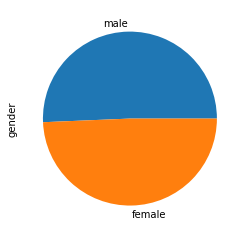

In [16]:
blogdata.gender.value_counts().plot(kind="pie")

Slightly more men than women.

__Age:__

In [10]:
blogdata['age'].value_counts()

17    80859
24    80071
23    72889
16    72708
25    67051
26    55312
27    46124
15    41767
14    27400
34    21347
33    17584
35    17462
36    14229
13    13133
37     9317
38     7545
39     5556
40     5016
45     4482
43     4230
41     3738
48     3572
42     2908
46     2733
47     2207
44     2044
Name: age, dtype: int64

It appears that bloggers tend to be younger, but `.value_counts()` sorts by value so... it's a little hard to tell.

In [41]:
blogdata.age.describe()

count    681284.000000
mean         23.932326
std           7.786009
min          13.000000
25%          17.000000
50%          24.000000
75%          26.000000
max          48.000000
Name: age, dtype: float64

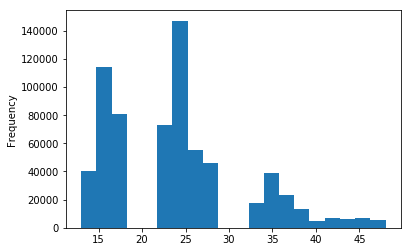

In [17]:
blogdata.age.plot.hist(bins=20)

Considering the mean age (23) and the histogram of ages, it looks like the bloggers tend to be younger, but there is definitely not a normal distribution.

__Gender and age:__

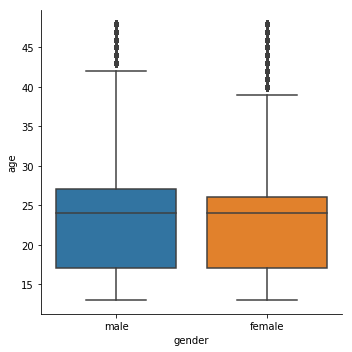

In [54]:
sns.catplot(x='gender', y='age', kind='box', data=blogdata)

By gender, the ages do not seem to differ substantially.

__Industry:__

In [46]:
blogdata.industry.value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

The following graph is the 2nd through 11th most common careers, because I wanted to exclude "unknown".

In [ ]:
top10 = blogdata.industry.value_counts()[1:11].plot(kind="bar")
top10.title("Top 10 Careers")
top10.show()

In [ ]:
blogdata.industry.value_counts()[-10:].plot(kind="bar")

Excluding unknown, the most common career is student. The least common is maritime.

In [26]:
blogdata.sign.value_counts()

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64

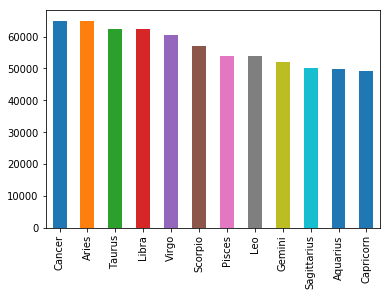

In [37]:
blogdata.sign.value_counts().plot(kind="bar")

No substantial difference between groups by astrological sign. I don't think I will use this aspect of the data that much.

Looking at the text
---
I want to do some preliminary exploration of the blog texts: looking at word frequencies, average blog length, and average word and sentence length.

In [88]:
blogdata.text[60000]

"       I've had a terrific day. It's been wonderfully productive. The football team was checked in with little incident, I cleaned my apartment, read, wrote, watched the Olympics, and now I just finished watching  The Hours .  Gymnasts are amazing!! I have a new found respect for male gymnists. All that they can do and all the strength it takes and all the flexibility it requires...well, it's just incredible to watch. I can't believe that they can twist and twirl like that on the pummel horse and hold themselves perfectly still on the uneven bars. It's amazing to watch!   The Hours ...what a movie!! This is about the third time I've seen it all the way through. I just love it. If you haven't seen it, rent it :) Even the third time the movie still touches me in a way that is unspeakable.  I'm listening to The Flaming Lips...  Quote of the evening...“Each has his past shut in him like leaves of a book known to him by his heart, and his friends can only read the title.” Virginia Woolf   

First I will create a tokens column in blogdata:

In [ ]:
tokens = blogdata.text.map(nltk.word_tokenize)

In [ ]:
blogdata[tokens] = tokens

And then I will create a token count column.

In [ ]:
songs['Token_count'] = songs.Tokens.map(len)